<a href="https://colab.research.google.com/github/gnodnooh/hydroclimatology/blob/main/practice_of_principal_component_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice of Principal Component Regression
Prepared by Donghoon Lee (Donghoon.Lee@umanitoba.ca)

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## We use the Diabetes data
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

See more details about the data at [here](https://scikit-learn.org/1.5/datasets/toy_dataset.html#diabetes-dataset:~:text=7.1.2.%20Diabetes%20dataset,-%23).

In [2]:
# Loading example dataset (you would replace this with your own data)
# Assuming 'X' is a (442x10) matrix, and 'y' is a (442x1) vector.
# Here, X and y should be replaced with actual data.
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data           # Features (replace this with actual NIR data)
y = data.target   # Target (replace this with actual octane data)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


## Covariance matrix and Correlation matrix

In [3]:
print('Covariance matrix')
cov_matrix = np.cov(X, rowvar=False)
print(cov_matrix.round(3))
print()
print('Correlation matrix')
corr_matrix = np.corrcoef(X, rowvar=False)
print(corr_matrix.round(3))

Covariance matrix
[[ 0.002  0.     0.     0.001  0.001  0.    -0.     0.     0.001  0.001]
 [ 0.     0.002  0.     0.001  0.     0.    -0.001  0.001  0.     0.   ]
 [ 0.     0.     0.002  0.001  0.001  0.001 -0.001  0.001  0.001  0.001]
 [ 0.001  0.001  0.001  0.002  0.001  0.    -0.     0.001  0.001  0.001]
 [ 0.001  0.     0.001  0.001  0.002  0.002  0.     0.001  0.001  0.001]
 [ 0.     0.     0.001  0.     0.002  0.002 -0.     0.001  0.001  0.001]
 [-0.    -0.001 -0.001 -0.     0.    -0.     0.002 -0.002 -0.001 -0.001]
 [ 0.     0.001  0.001  0.001  0.001  0.001 -0.002  0.002  0.001  0.001]
 [ 0.001  0.     0.001  0.001  0.001  0.001 -0.001  0.001  0.002  0.001]
 [ 0.001  0.     0.001  0.001  0.001  0.001 -0.001  0.001  0.001  0.002]]

Correlation matrix
[[ 1.     0.174  0.185  0.335  0.26   0.219 -0.075  0.204  0.271  0.302]
 [ 0.174  1.     0.088  0.241  0.035  0.143 -0.379  0.332  0.15   0.208]
 [ 0.185  0.088  1.     0.395  0.25   0.261 -0.367  0.414  0.446  0.389]
 [ 0.335  0.

## Data normalization

Normalization (or standardization) transforms the data so that it has a mean of 0 and a standard deviation of 1. This is expressed as:

> $$
X_{standardized} = \frac{X - \mu_X}{\sigma_X}
$$

Question: Is it better to apply normalization before PCA? Why? How about the dataset we are using?


<!-- Answer:

Yes, it is generally better to apply normalization before performing Principal Component Analysis (PCA). The reason is that PCA is sensitive to the scale of the variables. If the features in the dataset have different units or scales, variables with larger ranges can dominate the principal components, leading to misleading results. Normalization ensures that each feature contributes equally to the analysis, making PCA more effective in identifying the true patterns in the data.

For the dataset we are using (diabetes data), normalization is essential because the features (such as age, BMI, blood pressure, etc.) may have different ranges. By standardizing the data, we ensure that each principal component captures meaningful variations across all features. -->


In [4]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [5]:
print('Covariance matrix')
cov_matrix = np.cov(X, rowvar=False)
print(cov_matrix.round(3))

Covariance matrix
[[ 1.002  0.174  0.186  0.336  0.261  0.22  -0.075  0.204  0.271  0.302]
 [ 0.174  1.002  0.088  0.242  0.035  0.143 -0.38   0.333  0.15   0.209]
 [ 0.186  0.088  1.002  0.396  0.25   0.262 -0.368  0.415  0.447  0.39 ]
 [ 0.336  0.242  0.396  1.002  0.243  0.186 -0.179  0.258  0.394  0.391]
 [ 0.261  0.035  0.25   0.243  1.002  0.899  0.052  0.543  0.517  0.326]
 [ 0.22   0.143  0.262  0.186  0.899  1.002 -0.197  0.661  0.319  0.291]
 [-0.075 -0.38  -0.368 -0.179  0.052 -0.197  1.002 -0.74  -0.399 -0.274]
 [ 0.204  0.333  0.415  0.258  0.543  0.661 -0.74   1.002  0.619  0.418]
 [ 0.271  0.15   0.447  0.394  0.517  0.319 -0.399  0.619  1.002  0.466]
 [ 0.302  0.209  0.39   0.391  0.326  0.291 -0.274  0.418  0.466  1.002]]


## Multiple Linear Regression model

The MLR is expressed as

> $$
y = X\beta + \epsilon, \quad (1)
$$

where $y$ is a vector of $n$ observations on the dependent variable, measured about their mean, $X$ is an ($n \times p$) matrix whose ($i, j$)th element is the value of the $j$th predictor (or regressor) variable for the ith observation, again measured about its mean, $\beta$ is a vector of $p$ regression coefficients and $\epsilon$ is a vector of error terms.

In [6]:
# Initialize and train the Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)
beta = mlr_model.coef_
print(beta.round(3))
y_hat_mlr = mlr_model.predict(X)

[ -0.476 -11.407  24.727  15.429 -37.68   22.676   4.806   8.422  35.734
   3.217]


correlation:	 0.72
r-squared:	 0.518


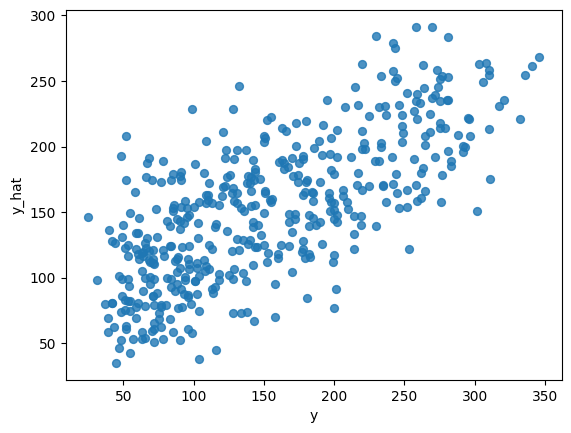

In [7]:
df = pd.DataFrame({'y': y, 'y_hat': y_hat_mlr})
df.plot(x='y', y='y_hat', kind='scatter', s=32, alpha=.8)
print('correlation:\t', np.round(df.corr().values[0, 1], 3))
print('r-squared:\t', np.round(r2_score(y, y_hat_mlr),3))

## Principal Component Analysis (PCA)

The value of the PCs for each observation are given by

> $$
Z = XA, \quad (2)
$$

where the ($i, k$)th element of $Z$ is the value (score) of the $k$th PC for the $i$th observation, and $A$ is a ($p \times p$) matrix whose $k$th column is the $k$th eigenvector of $X'X$.


In [8]:
pca = PCA(n_components=X.shape[1])
Z = pca.fit_transform(X)  # Z is PC matrix (n x p)
A = pca.components_       # A is Eigenvector (p x p)
print(pca.components_.shape)
print(Z.shape)

(10, 10)
(442, 10)


Check the variance explained by each principal component (PC). Accumulate these values to determine the number of PCs you would like to retain.

Hint: 80%

In [9]:
var_explained = pca.explained_variance_ratio_ # Eigenvalues
print('Variance explained')
print(var_explained.round(3))
print('Cumulative variance explained')
print(np.cumsum(var_explained).round(3))

Variance explained
[0.402 0.149 0.121 0.096 0.066 0.06  0.054 0.043 0.008 0.001]
Cumulative variance explained
[0.402 0.552 0.672 0.768 0.834 0.894 0.948 0.991 0.999 1.   ]


In [10]:
# Is correlation matrix used for PCA analysis?
print(pca.get_covariance().round(3))

[[ 1.002  0.174  0.186  0.336  0.261  0.22  -0.075  0.204  0.271  0.302]
 [ 0.174  1.002  0.088  0.242  0.035  0.143 -0.38   0.333  0.15   0.209]
 [ 0.186  0.088  1.002  0.396  0.25   0.262 -0.368  0.415  0.447  0.39 ]
 [ 0.336  0.242  0.396  1.002  0.243  0.186 -0.179  0.258  0.394  0.391]
 [ 0.261  0.035  0.25   0.243  1.002  0.899  0.052  0.543  0.517  0.326]
 [ 0.22   0.143  0.262  0.186  0.899  1.002 -0.197  0.661  0.319  0.291]
 [-0.075 -0.38  -0.368 -0.179  0.052 -0.197  1.002 -0.74  -0.399 -0.274]
 [ 0.204  0.333  0.415  0.258  0.543  0.661 -0.74   1.002  0.619  0.418]
 [ 0.271  0.15   0.447  0.394  0.517  0.319 -0.399  0.619  1.002  0.466]
 [ 0.302  0.209  0.39   0.391  0.326  0.291 -0.274  0.418  0.466  1.002]]


## PCR Model 1: Using principal components as predictors

Because $A$ is orthogonal, $X\beta$ can be rewritten as $XAA'\beta = Z\gamma$, where $\gamma=A'\beta$. The MLR equation can therefore be written as:

> $$
y = Z\gamma + \epsilon \quad (3)
$$

which has simply replaced the predictor variables by their principal components (PCs) in the regression model. Principal component regression (PCR) can be defined as the use of the model or of the reduced model:


> $$
y = Z_m\gamma_m + \epsilon_m, \quad (4)
$$

where $\gamma_m$ is a vector of $m$ elements that are a subset of elements of $\gamma$, $Z_m$ is an $n \times m$ matrix whose columns are the corresponding subset of columns of $Z$, and $\epsilon_m$ is the appropriate error term.

When you fit a PCR model on the standardized $X$, the predictions  $\hat{y}$ you get are based on this centered version of $y$. Therefore, the predicted $\hat{y}$ values are also mean-centered and will not reflect the original scale of $y$.



In [11]:
npc = 5  # number of retained PCs
gamma = LinearRegression().fit(Z[:, :npc], y).coef_
print(gamma.round(3))
y_hat_pcr1 = Z[:, :npc].dot(gamma)
y_hat_pcr1 = y_hat_pcr1 + y.mean()
print('r-squared:\t', np.round(r2_score(y, y_hat_pcr1),3))

[ 21.318 -12.212  11.332 -28.211   0.794]
r-squared:	 0.5


## PCR Model 2: Using original features as predictors

Using least squares to estimate $\gamma$ in (3) and then finding an estimate for $\beta$ from the equation:

> $$
\beta = A\gamma \quad (5)
$$

is equivalent to finding $\beta$ by applying least squares directly to (1).

In [12]:
beta = pca.components_[:npc, :].T.dot(gamma)  # Transform gamma to beta
print(beta.round(3))
y_hat_pcr2 = X.dot(beta)
y_hat_pcr2 = y_hat_pcr2 + y.mean()
print('r-squared:\t', np.round(r2_score(y, y_hat_pcr1),3))
print(f'Corr(PCR1, PCR2): {np.corrcoef(y_hat_pcr1, y_hat_pcr2)[0, 1]:.3f}')  # This should be 1
print(f'Corr(MLR, PCR2): {np.corrcoef(y_hat_mlr, y_hat_pcr2)[0,1]:.3f}')

[ -1.457 -11.98   24.268  12.36   -2.489  -5.949 -10.168   5.998  16.692
  13.475]
r-squared:	 0.5
Corr(PCR1, PCR2): 1.000
Corr(MLR, PCR2): 0.983


Adjust the number of retained principal components (npc) to match the number of predictors, and then re-run the two cells above.



## PCR Model 2: Forecasting practice
We split the data 70% for training and 30% for testing.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (309, 10)
y_train shape: (309,)
X_test shape: (133, 10)
y_test shape: (133,)


In [18]:
# Normalization based on X_train
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X_train)

# PCR2 modeling based on training data
pca = PCA(n_components=X_train.shape[1])
Z = pca.fit_transform(X_train)
print(np.cumsum(pca.explained_variance_ratio_.round(3)))
npc = 5 # Adjust npc
gamma = LinearRegression().fit(Z[:, :npc], y_train).coef_
beta = pca.components_[:npc, :].T.dot(gamma)
print(gamma.round(3))
print(beta.round(3))
y_train_hat = X_train.dot(beta) + y_train.mean()

# PCR2 Forecast on testing data
y_test_hat = X_test.dot(beta) + y_train.mean()

# Results
print(f'Corr(yTran, yTranHat): {np.corrcoef(y_train, y_train_hat)[0, 1]:.3f}')
print(f'Corr(yTest, yTestHat): {np.corrcoef(y_test, y_test_hat)[0, 1]:.3f}')
print(f'R2(yTran, yTranHat): {r2_score(y_train, y_train_hat):.3f}')
print(f'R2(yTest, yTestHat): {r2_score(y_test, y_test_hat):.3f}')

[0.399 0.546 0.671 0.768 0.834 0.894 0.948 0.992 1.    1.001]
[ 448.998 -287.102  397.038 -488.625  -22.296]
[ -14.92  -242.884  498.89   299.629  -76.363 -137.13  -223.07   122.871
  316.208  305.863]
Corr(yTran, yTranHat): 0.708
Corr(yTest, yTestHat): 0.696
R2(yTran, yTranHat): 0.500
R2(yTest, yTestHat): 0.484
